### Clasificación de Imágenes

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image


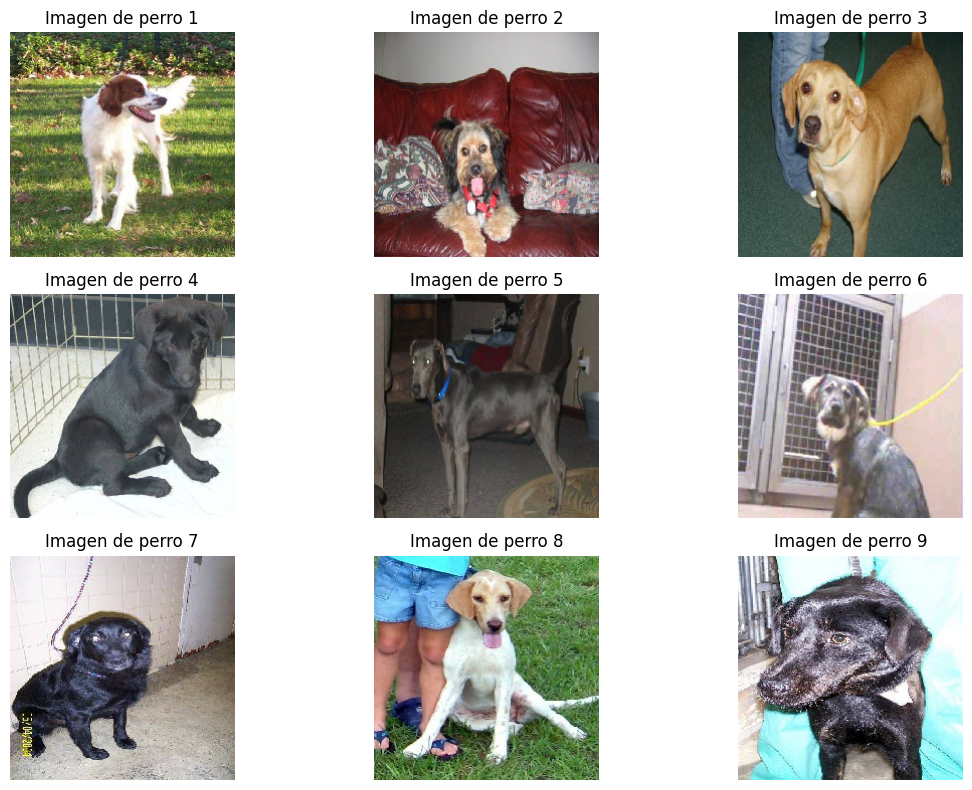

In [9]:
 #Importar y verificar las primeras 9 imágenes de perros
# Ruta al directorio que contiene tus datos de imágenes
data_dir = "../data/raw/train"
# Obtener una lista de nombres de archivos de imágenes que comienzan con 'dog'
dog_image_files = [f for f in os.listdir(data_dir) if f.startswith('dog')]
# Cargar las primeras nueve imágenes de perros
dog_images = []
for i in range(9):
    # Itera 9 veces, con la variable 'i' tomando valores de 0 a 8.
    img_path = os.path.join(data_dir, dog_image_files[i])
    # Construye el camino completo al archivo de imagen concatenando la ruta del directorio
    # 'data_dir' con el nombre del i-ésimo archivo en la lista 'dog_image_files'.
    # Esto da como resultado la ruta completa al archivo de la imagen actual que se va a cargar.
    img = image.load_img(img_path, target_size=(224, 224))
    # Carga la imagen usando la ruta 'img_path'. El argumento 'target_size' redimensiona la imagen
    # a 224x224 píxeles, que es un tamaño común para las imágenes de entrada en redes neuronales convolucionales.
    img_array = image.img_to_array(img)
    # Convierte la imagen cargada 'img' en un array de Numpy. Esto transforma la imagen en una estructura de datos
    # que puede ser procesada por bibliotecas de aprendizaje automático como Keras/TensorFlow.
    img_array /= 255.0
    # Normaliza los valores de los píxeles del array de imagen dividiendo cada píxel por 255.
    # Esto es comúnmente requerido por modelos de redes neuronales ya que la normalización generalmente
    # mejora el rendimiento del entrenamiento. Los valores de los píxeles están ahora en el rango [0, 1].
    dog_images.append(img_array)
    # Añade el array de imagen normalizado a la lista 'dog_images'. Después de completar el ciclo 'for',
    # 'dog_images' contendrá 9 imágenes representadas como arrays de Numpy.
# Crear una única figura para mostrar todas las nueve imágenes
plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Imagen de perro ' + str(i+1))
    plt.axis('off')
# Ajustar el diseño
plt.tight_layout()
# Mostrar las imágenes
plt.show()









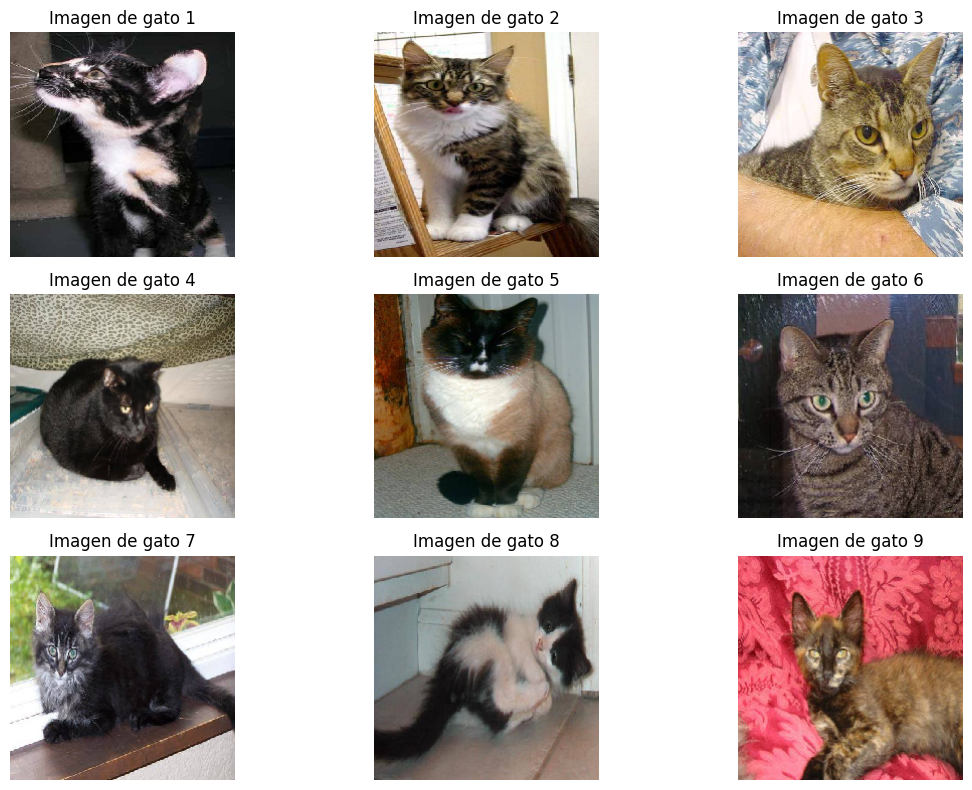

In [10]:
#Importar y verificar las primeras 9 imágenes de perros
# Ruta al directorio que contiene tus datos de imágenes
data_dir = "../data/raw/train"
# Obtener una lista de nombres de archivos de imágenes que comienzan con 'dog'
cat_image_files = [f for f in os.listdir(data_dir) if f.startswith('cat')]
# Cargar las primeras nueve imágenes de perros
cat_images = []
for i in range(9):
    # Itera 9 veces, con la variable 'i' tomando valores de 0 a 8.
    img_path = os.path.join(data_dir, cat_image_files[i])
    # Construye el camino completo al archivo de imagen concatenando la ruta del directorio
    # 'data_dir' con el nombre del i-ésimo archivo en la lista 'dog_image_files'.
    # Esto da como resultado la ruta completa al archivo de la imagen actual que se va a cargar.
    img = image.load_img(img_path, target_size=(224, 224))
    # Carga la imagen usando la ruta 'img_path'. El argumento 'target_size' redimensiona la imagen
    # a 224x224 píxeles, que es un tamaño común para las imágenes de entrada en redes neuronales convolucionales.
    img_array = image.img_to_array(img)
    # Convierte la imagen cargada 'img' en un array de Numpy. Esto transforma la imagen en una estructura de datos
    # que puede ser procesada por bibliotecas de aprendizaje automático como Keras/TensorFlow.
    img_array /= 255.0
    # Normaliza los valores de los píxeles del array de imagen dividiendo cada píxel por 255.
    # Esto es comúnmente requerido por modelos de redes neuronales ya que la normalización generalmente
    # mejora el rendimiento del entrenamiento. Los valores de los píxeles están ahora en el rango [0, 1].
    cat_images.append(img_array)
    # Añade el array de imagen normalizado a la lista 'dog_images'. Después de completar el ciclo 'for',
    # 'dog_images' contendrá 9 imágenes representadas como arrays de Numpy.
# Crear una única figura para mostrar todas las nueve imágenes
plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cat_images[i])
    plt.title('Imagen de gato ' + str(i+1))
    plt.axis('off')
# Ajustar el diseño
plt.tight_layout()
# Mostrar las imágenes
plt.show()



In [11]:
from keras.preprocessing.image import ImageDataGenerator
# Importa la clase ImageDataGenerator de la biblioteca Keras. Esta clase permite la configuración
# de la preparación y el aumento de datos de imagen para el entrenamiento de modelos de aprendizaje automático.
# Define a few rules for DataGen
train_dir = "../data/raw/train/"
# Define la ruta al directorio que contiene los datos de entrenamiento.
image_size = (200, 200)
# Establece el tamaño al que se redimensionarán las imágenes cuando se carguen. Todas las imágenes
# se cambiarán de tamaño a 200x200 píxeles.
datagentrain = ImageDataGenerator()
# Crea una instancia de ImageDataGenerator para los datos de entrenamiento sin ninguna
# modificación o aumento de imagen (por defecto, todas las opciones están establecidas para no realizar cambios).
datagentest = ImageDataGenerator()
# Crea otra instancia de ImageDataGenerator para los datos de prueba, también sin
# modificaciones o aumentos de datos.
# Train Data Generation
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size=image_size,
    classes=["dog", "cat"]
)
# Utiliza el método flow_from_directory() del objeto datagentrain para crear un generador
# que cargará las imágenes de entrenamiento desde 'train_dir'. Las imágenes se redimensionarán
# a 200x200 píxeles ('image_size') y se espera que las imágenes se organicen en subdirectorios
# basados en la clase, específicamente 'dog' y 'cat'.
# Test Data Generation
test_data = datagentest.flow_from_directory(
    train_dir,
    target_size=image_size,
    classes=["test"]
)
# Utiliza el método flow_from_directory() del objeto datagentest para crear un generador que
# cargará las imágenes de prueba desde 'train_dir'. Al igual que con el generador de entrenamiento,
# redimensionará las imágenes a 200x200 píxeles. Sin embargo, en este caso, se espera que las
# imágenes de prueba estén bajo un subdirectorio 'test'.





















Found 0 images belonging to 2 classes.
Found 0 images belonging to 1 classes.


In [15]:
# Move the Data Through the Neural Network
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

model = Sequential()
model.add(Conv2D(input_shape = (224,224,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

# Move the Data through the Dense Layers
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

In [16]:
# Compile the Model using Adam 
from keras.optimizers import Adam

# Compile the Model before Training
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])

In [18]:
# Train the Model
model.fit(train_data, epochs = 1)

ValueError: Asked to retrieve element 0, but the Sequence has length 0

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("../models/vgg16_1.h5", monitor = "val_accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")
early = EarlyStopping(monitor = "val_accuracy", patience = 3, verbose = 1, mode = "auto")
hist = model.fit(train_data, steps_per_epoch = 100, validation_data = test_data, validation_steps = 10, epochs = 3, callbacks = [checkpoint, early])

In [ ]:
from keras.preprocessing import image
from keras.models import load_model

img = image.load_img("../data/raw/test/9.jpg", target_size = (200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
saved_model = load_model("../models/vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")